<a href="https://colab.research.google.com/github/anupojuharshita/GEN_AI-project/blob/main/lane%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/lane_image')

Mounted at /content/lane_image


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2
import matplotlib.pyplot as plt

In [29]:
image_path=('/content/drive/MyDrive/ai image.jpg')

display image


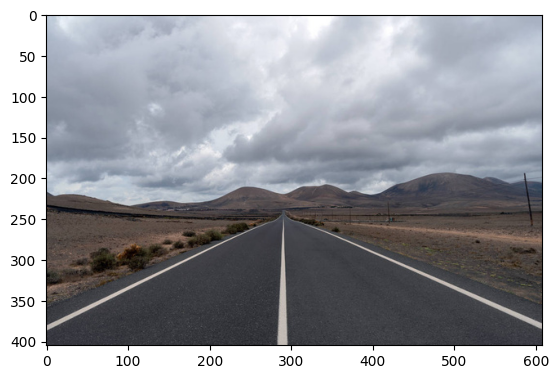

In [30]:
image = cv2.imread(image_path)
if image is not None:
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.axis('on')
  plt.show()


convert to grayscaler


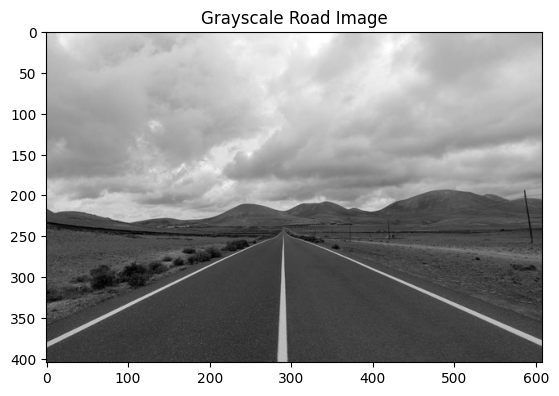

In [31]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Road Image")
plt.axis("on")
plt.show()

gaussian filtering

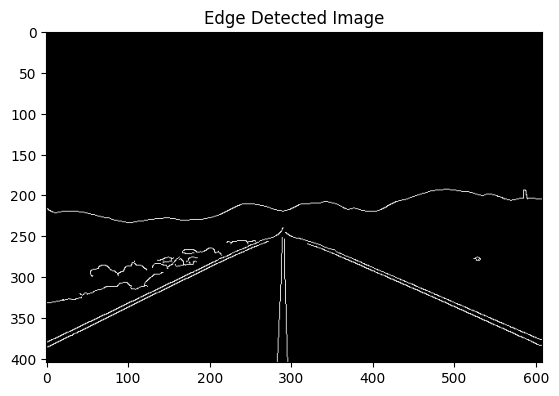

In [32]:
blurred = cv2.GaussianBlur(gray_image, (7,7), 0)
edges = cv2.Canny(blurred, 50, 150)
plt.imshow(edges, cmap="gray")
plt.title("Edge Detected Image")
plt.axis("on")
plt.show()

In [33]:
import numpy as np

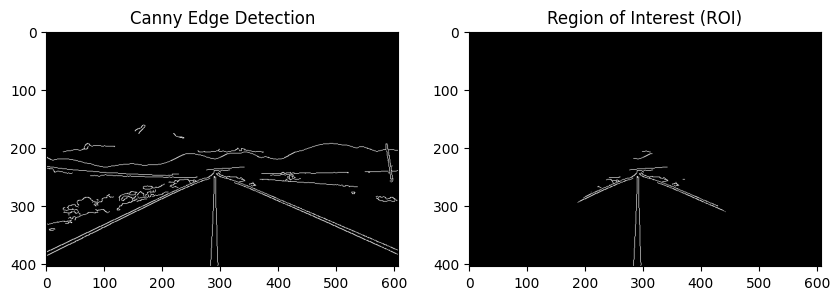

In [58]:
def region_of_interest(image):
    """
    Applies a mask to keep only the region of interest (ROI).
    """
    height, width = image.shape


    mask = np.zeros_like(image)
    polygon = np.array([
        [(50, height), (width - 50, height), (width // 2, height // 2)]
    ], dtype=np.int32)


    cv2.fillPoly(mask, polygon, 255)

    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

image = cv2.imread("/content/drive/MyDrive/ai image.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5,5), 0)
edges = cv2.Canny(blurred, 50, 150)


roi_edges = region_of_interest(edges)


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edge Detection")

plt.subplot(1,2,2)
plt.imshow(roi_edges, cmap="gray")
plt.title("Region of Interest (ROI)")

plt.show()